In [6]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from code.preprocessing import squad_preprocess as sp


In [4]:
import tensorflow as tf

In [7]:
fileBidaf = 'preds-gen-bidaf'
fileSelf1 = 'preds-gen-self1'
fileSelf2 = 'preds-gen-self2'
filePreds = 'preds-gen-preds'
fileTrue = 'preds-gen'
bdict = json.load(open(fileBidaf, 'r'))
sdict1 = json.load(open(fileSelf1, 'r'))
sdict2 = json.load(open(fileSelf2, 'r'))
pdict = json.load(open(filePreds, 'r'))
adict = json.load(open(fileTrue, 'r'))

qFile = 'data/tiny-dev.json'
data = json.load(open(qFile, 'r'))
paras = data['data'][0]['paragraphs']
para = paras[1]

In [8]:
def createHeatmap(data, xlabel, ylabel, figsize=(40, 3)):
#     fig, ax = plt.subplots()
    plt.figure(dpi=200, facecolor='white', figsize=figsize)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    labelbottom='on', # labels along the bottom edge are off
    labeltop='on') # labels along the bottom edge are off
    
    plt.imshow(data, cmap='Blues', interpolation='nearest')
    plt.yticks(np.arange(len(ylabel)), ylabel)
    plt.xticks(np.arange(len(xlabel)), xlabel, rotation='vertical')
    return plt

In [26]:
sentenceList = []
sentenceStart = 0
con = sp.tokenize(c1)
for i in range(len(con)):
    token = con[i]
    if token == '.':
        sentenceList += [(sentenceStart, i)]
        sentenceStart = i+1


<IPython.core.display.Javascript object>


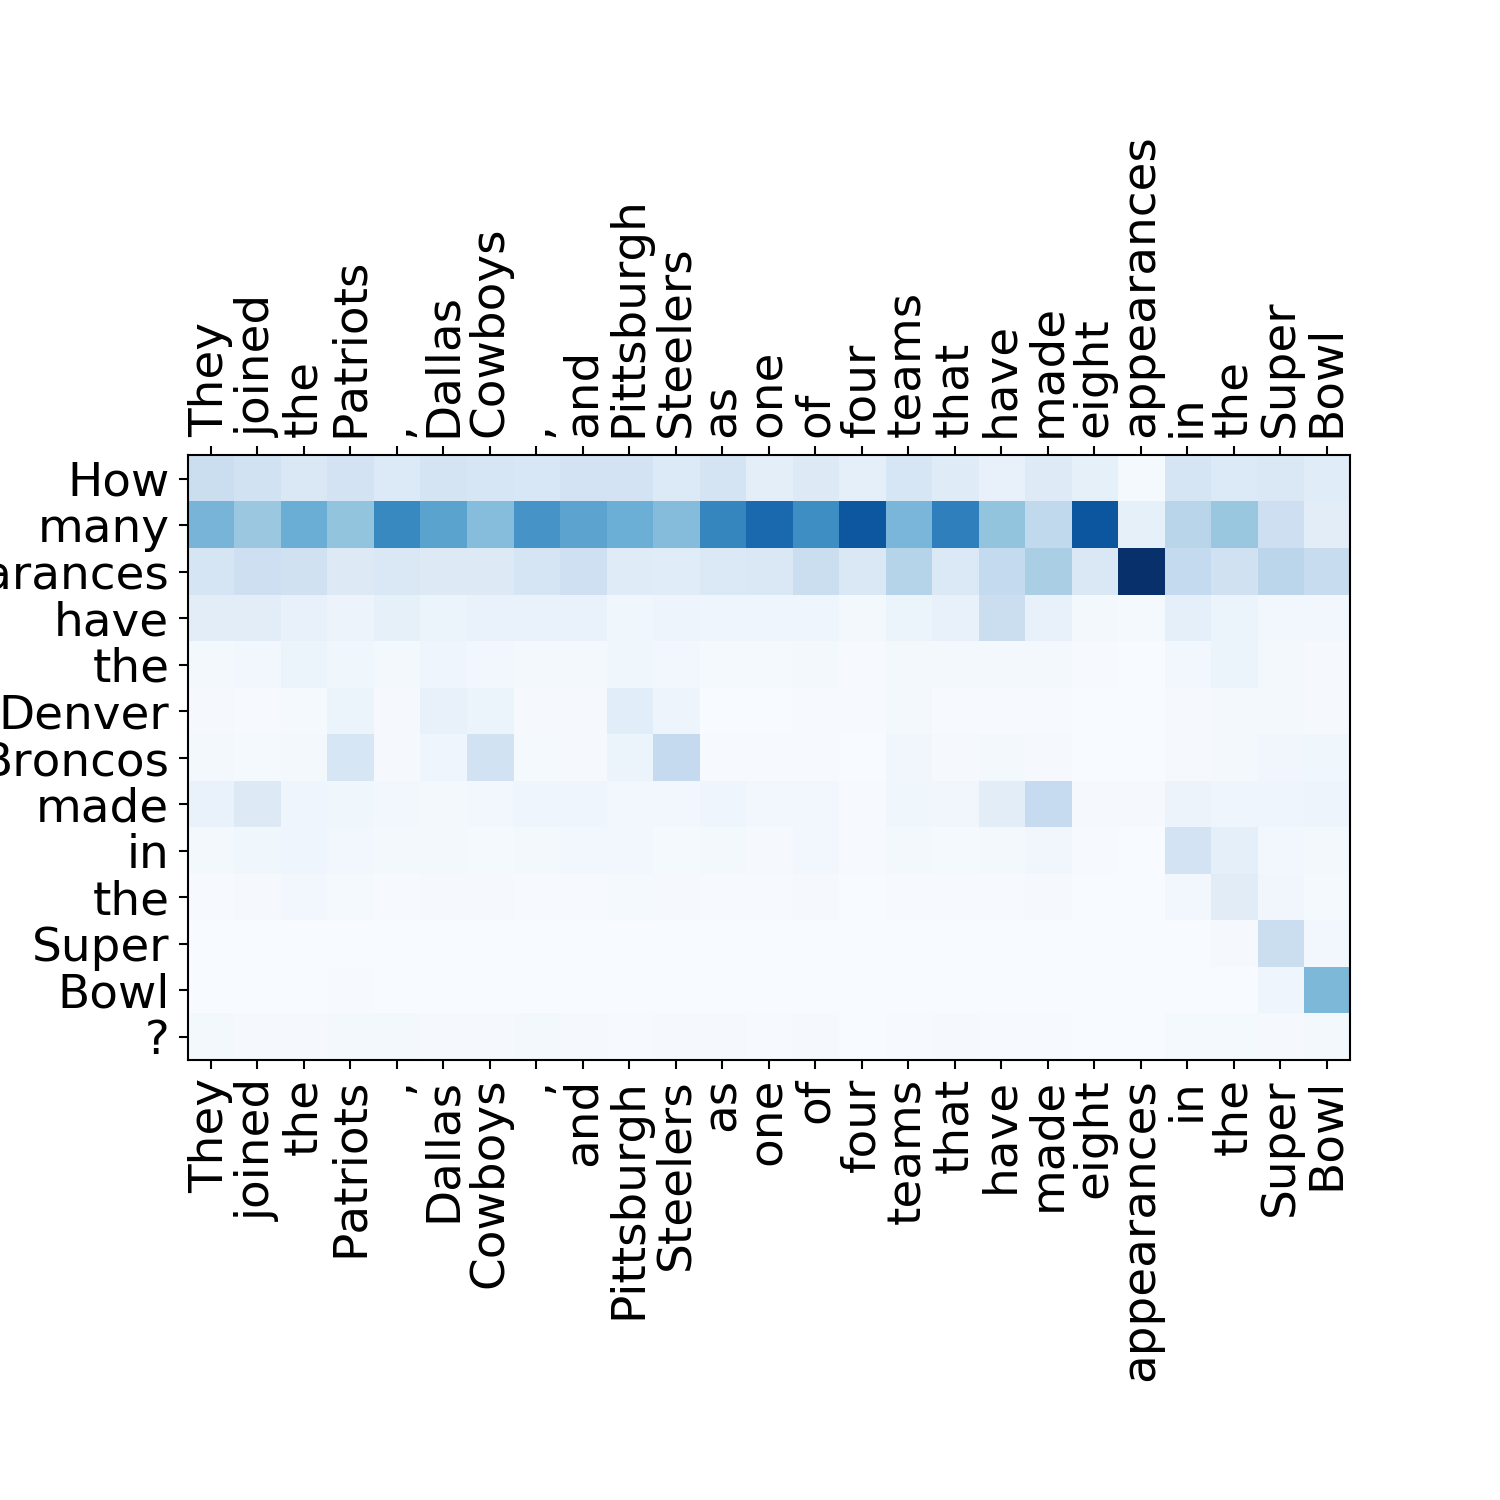

<IPython.core.display.Javascript object>


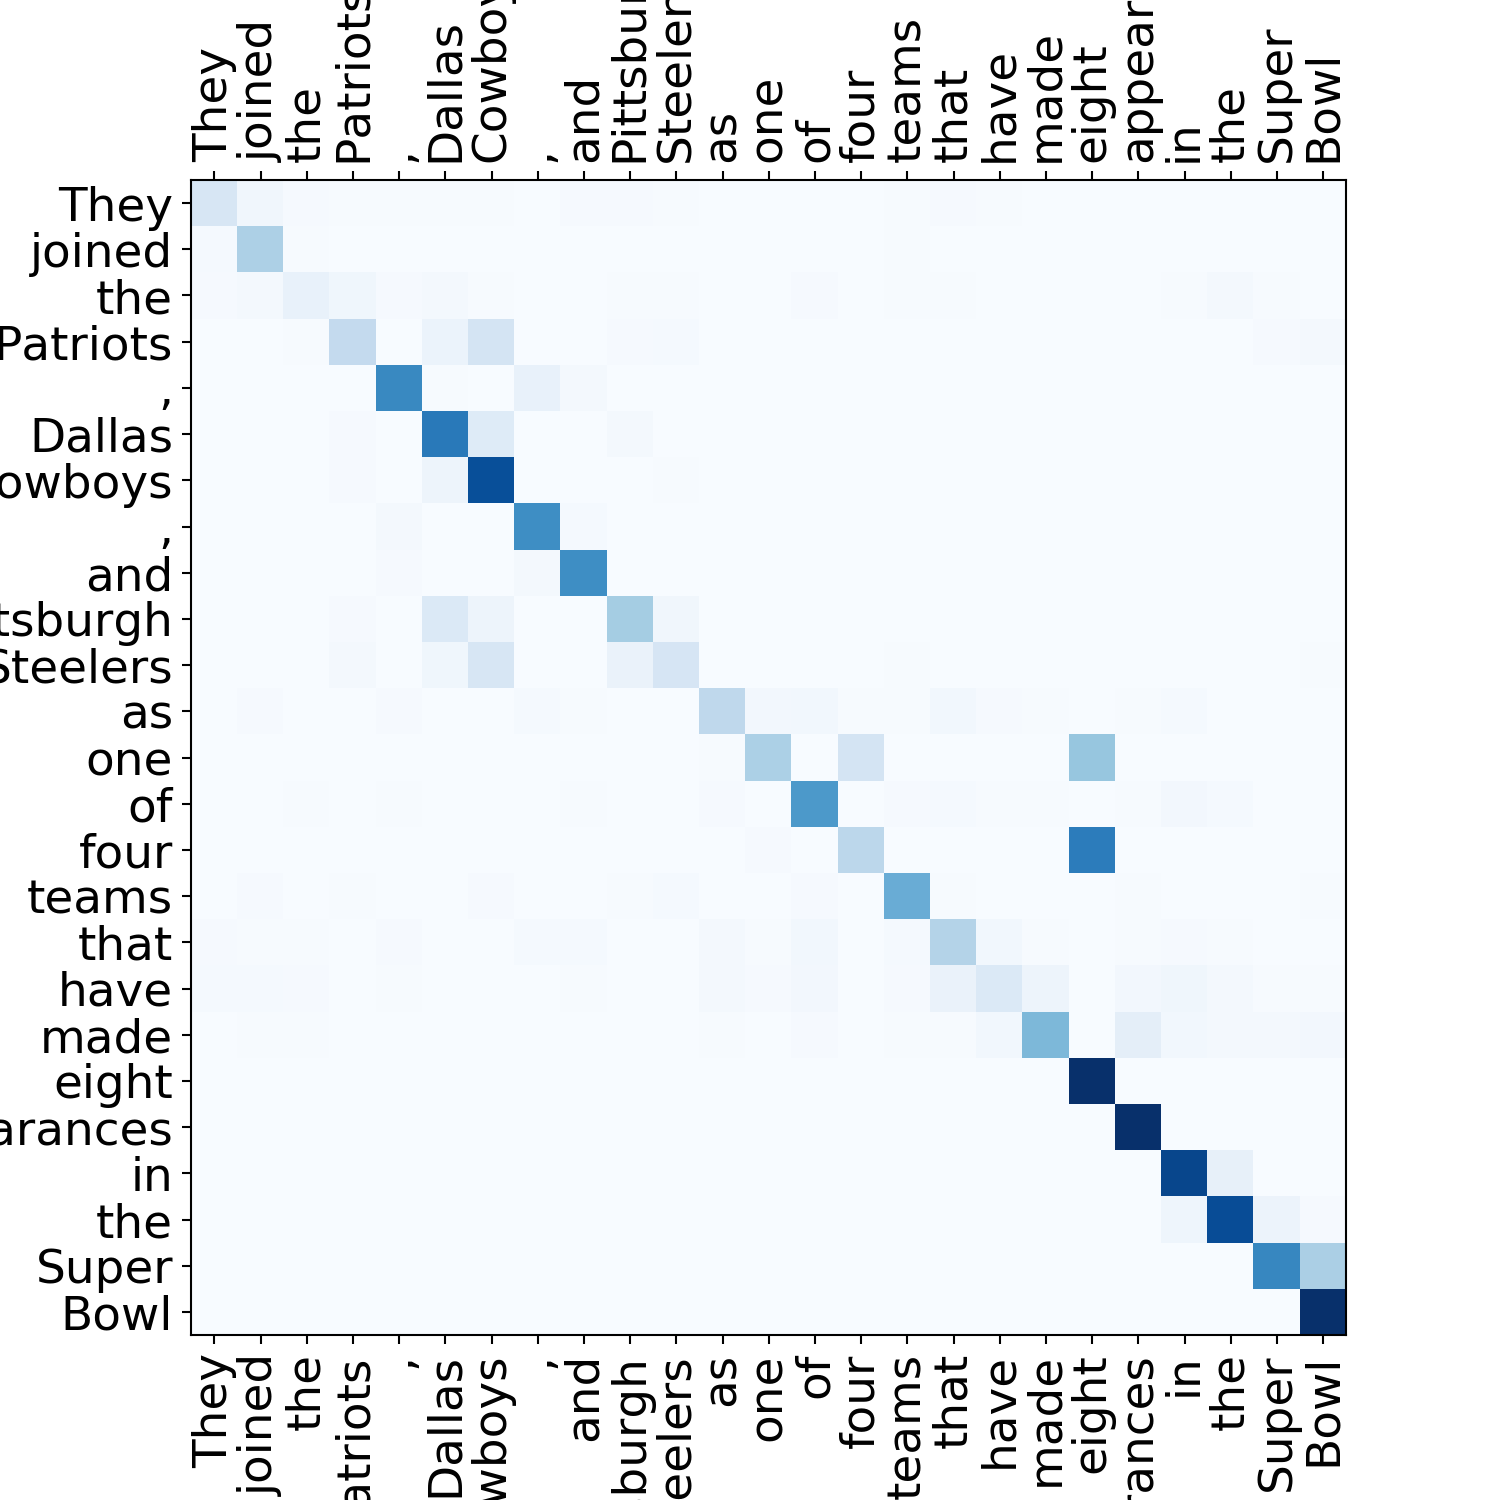

<IPython.core.display.Javascript object>


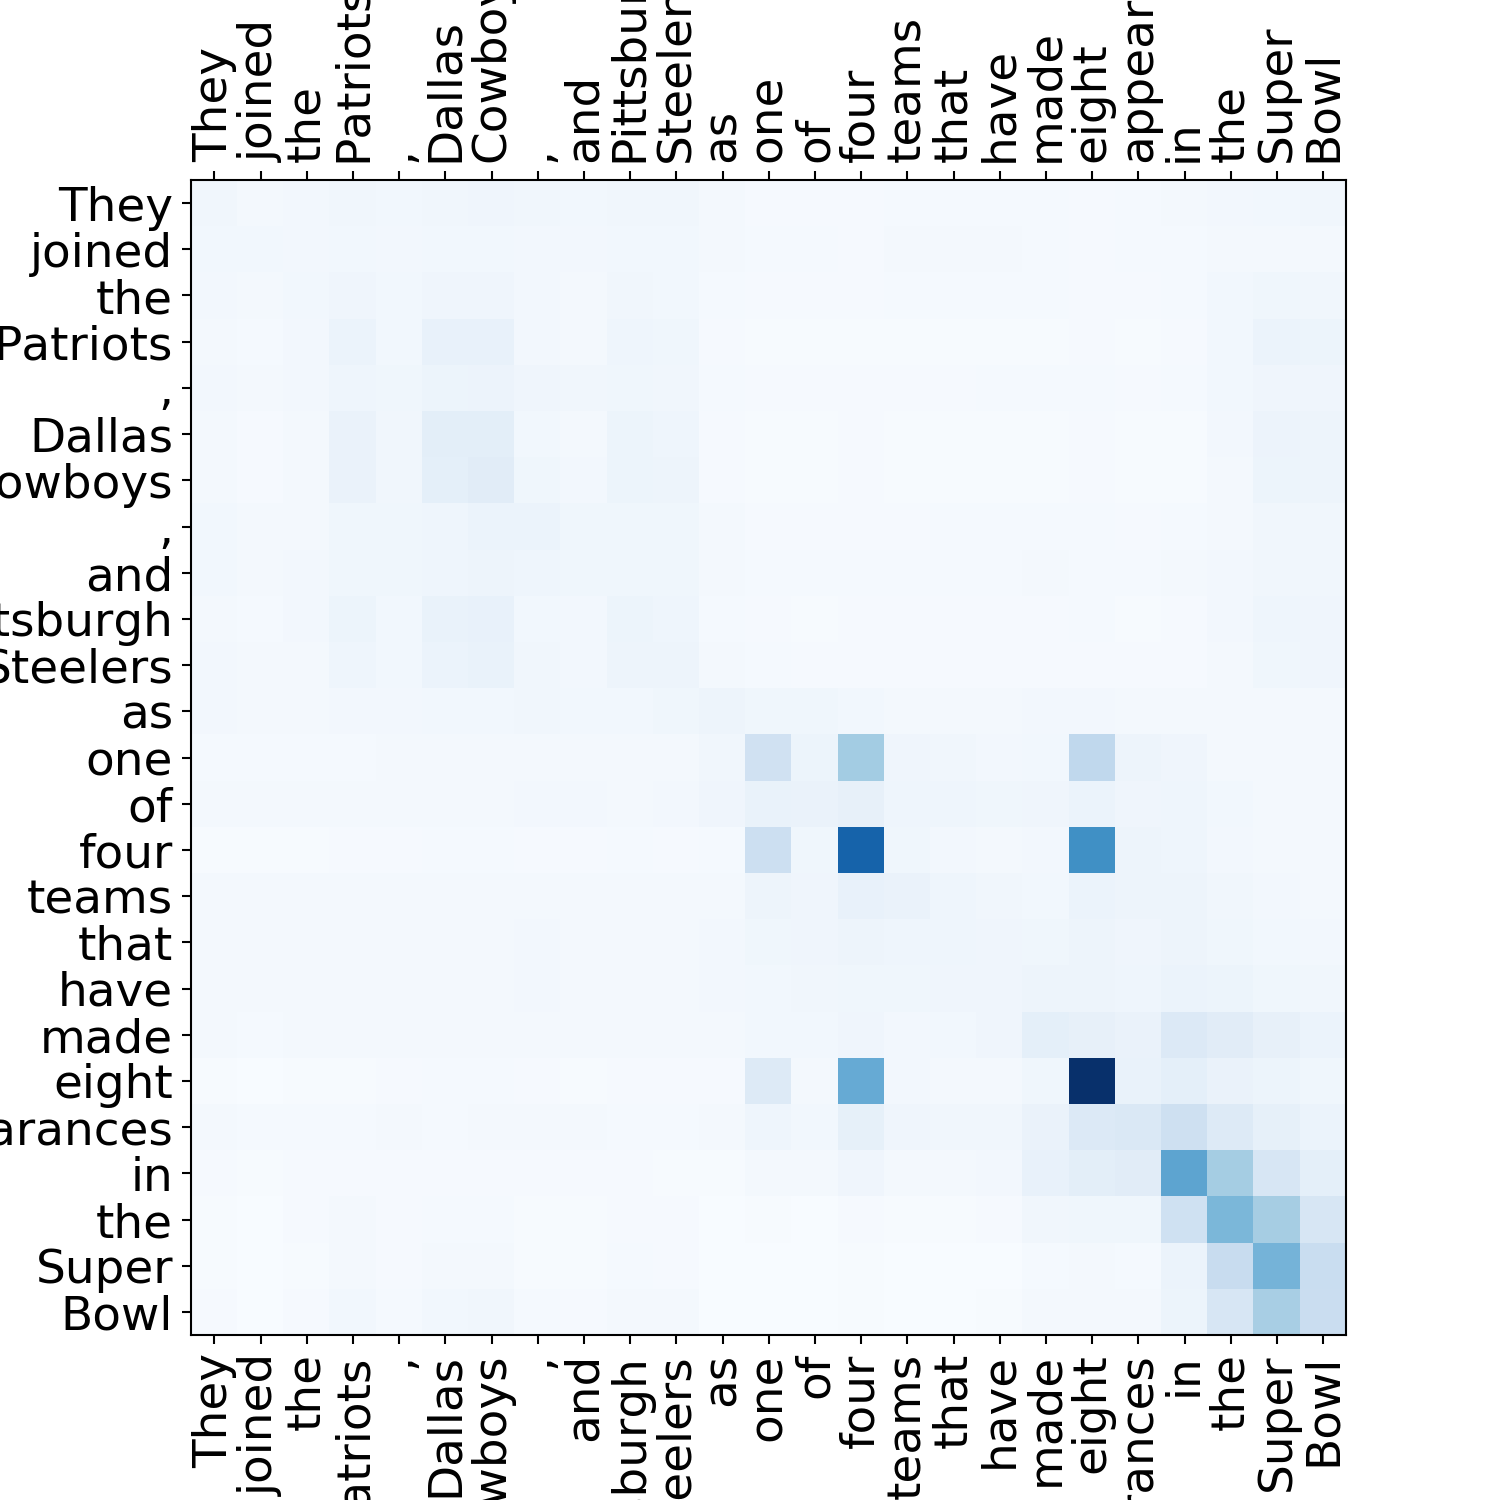

<IPython.core.display.Javascript object>


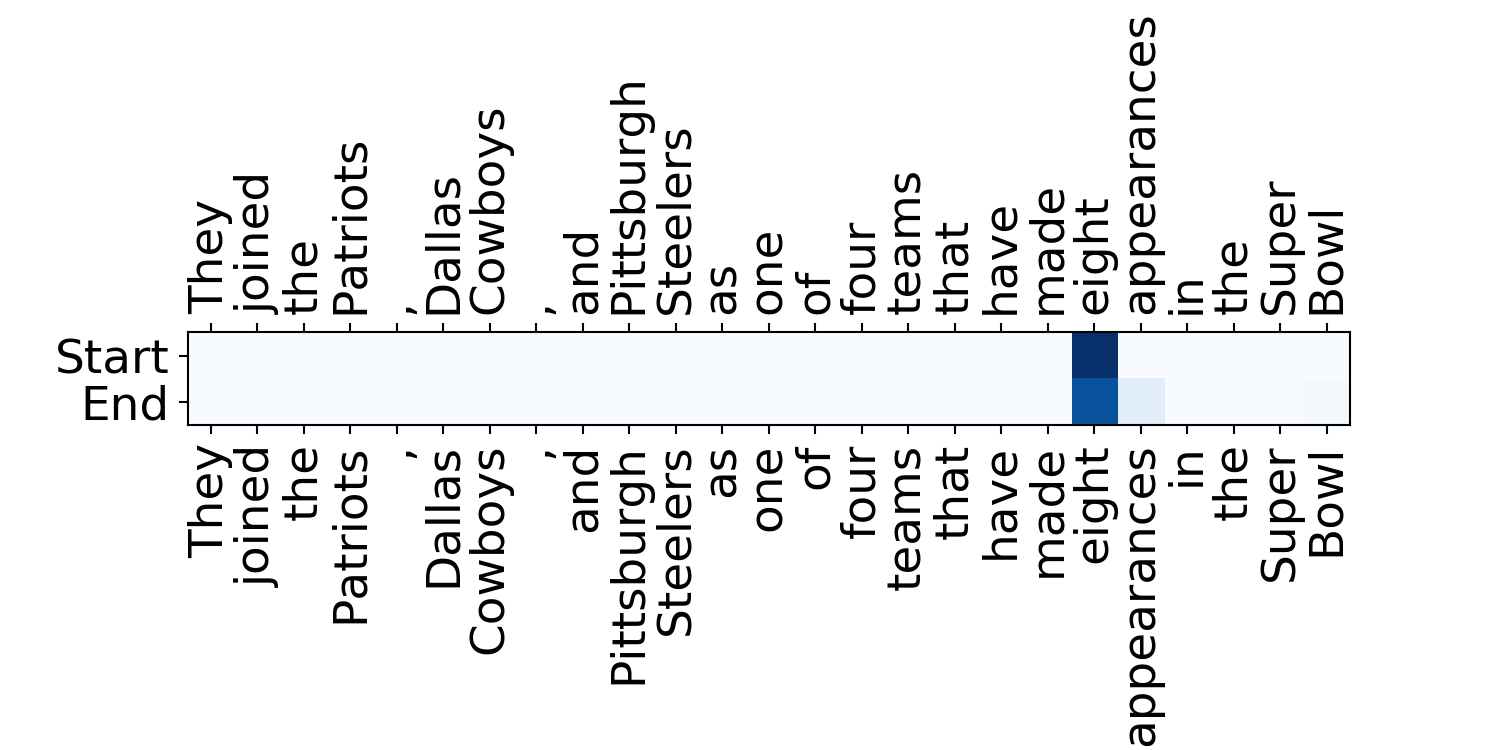

In [27]:
matplotlib.rcParams.update({'font.size': 18})

c1 = para['context']
qlist = para['qas']
keypos = 1
q = qlist[keypos]['question']
k = qlist[keypos]['id']
print(k)
        
sentenceNum = 3
slice_start, slice_end = sentenceList[sentenceNum]

c = sp.tokenize(c1)[slice_start:slice_end]
q = sp.tokenize(q)

bidafsim = np.array(bdict[k])[slice_start:slice_end, :]
bidafsim = bidafsim[:len(c), :len(q)]
# plt = createHeatmap(bidafsim, q, c, (7, 10))
plt = createHeatmap(bidafsim.transpose(), c, q, (8, 8))
plt.show()

selfsim = np.array(sdict1[k])[slice_start:slice_end, slice_start:slice_end]
selfsim = selfsim[:len(c), :len(c)]
plt = createHeatmap(selfsim, c, c, (8, 8))
plt.show()

selfsim = np.array(sdict2[k])[slice_start:slice_end, slice_start:slice_end]
selfsim = selfsim[:len(c), :len(c)]
plt = createHeatmap(selfsim, c, c, (8, 8))
plt.show()

pred_start, pred_end = np.array(pdict[k][0][slice_start:slice_end]), np.array(pdict[k][1][slice_start:slice_end])
preds = np.vstack([pred_start, pred_end])
print(preds.shape, len(c))
plt = createHeatmap(preds, c, ['Start', 'End'], (8, 4))
plt.show()

In [23]:
sentenceList

[(0, 25), (26, 52), (53, 89), (90, 115)]